In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [4]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [5]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [26]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()

### Messing around with the data:

In [7]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

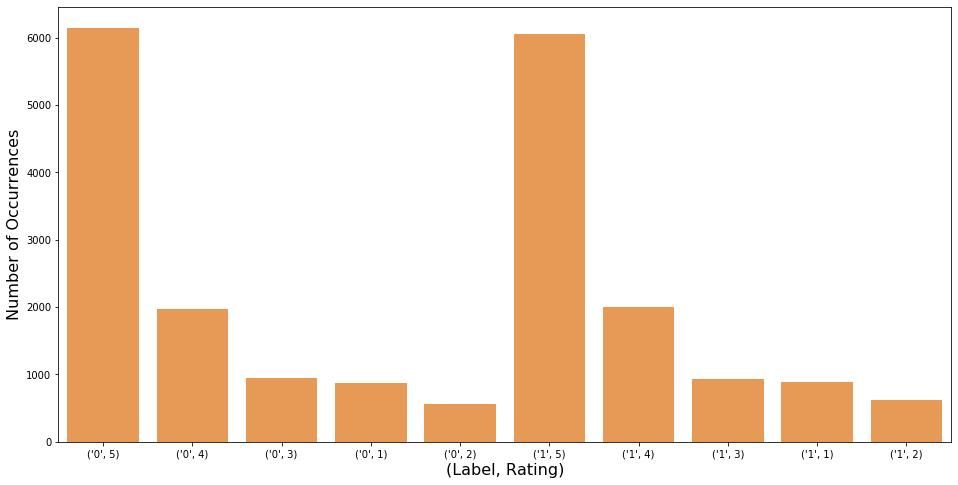

In [8]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.xticks(rotation='horizontal')
plt.show()

In [9]:
cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()


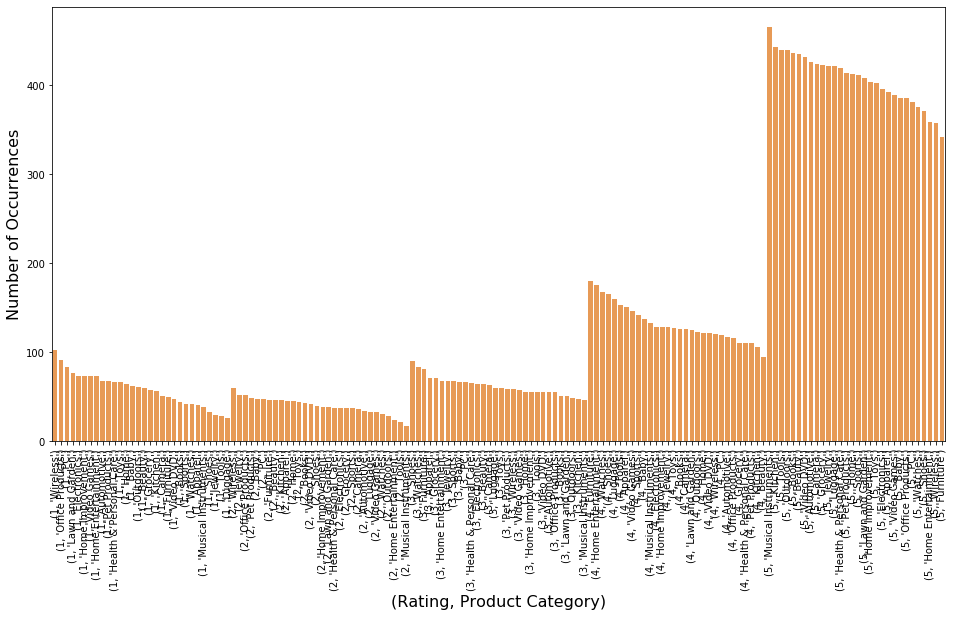

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()

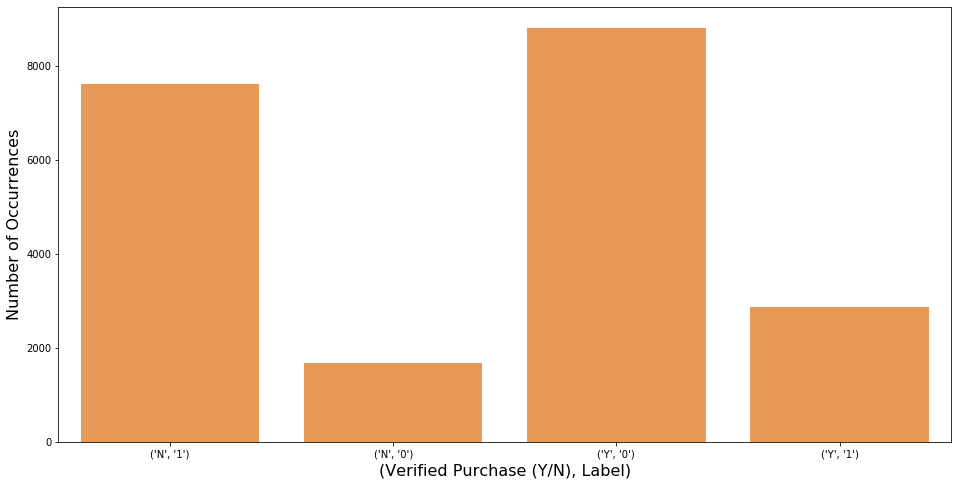

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Verified Purchase (Y/N), Label)', fontsize=16)
plt.xticks(rotation='horizontal')
plt.show()

In [30]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [31]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)


In [32]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

In [33]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))
#data['num_syllable'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('')))
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,15.6
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,0,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4,6.8
20996,20997,0,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,1,2.3
20997,20998,0,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,4,10.7
20998,20999,0,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,6,3.1


In [34]:
!pip install textstat

In [35]:
import textstat

In [36]:
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [37]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))

In [38]:
import nltk
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/nguyen_t1/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)


In [ ]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [33]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)


In [34]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

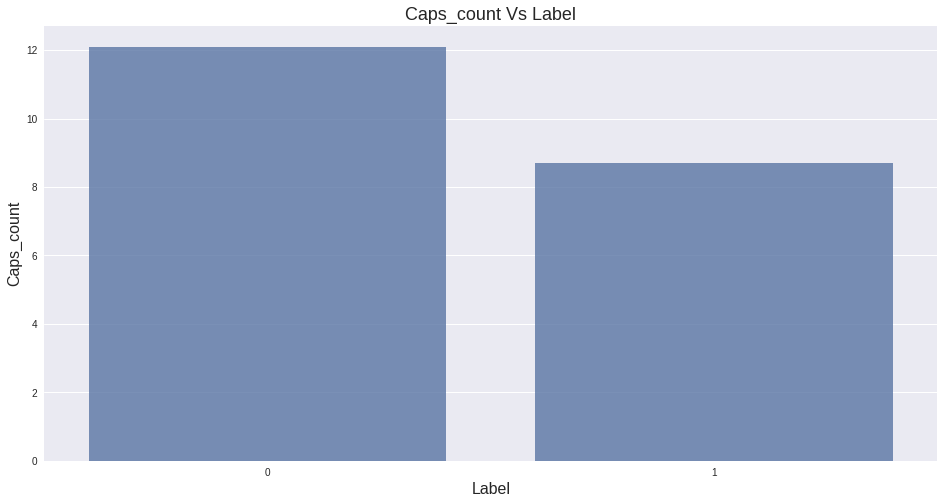

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [36]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [37]:
cnt_srs = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    15.571524
1    10.182571
Name: punct_count, dtype: float64

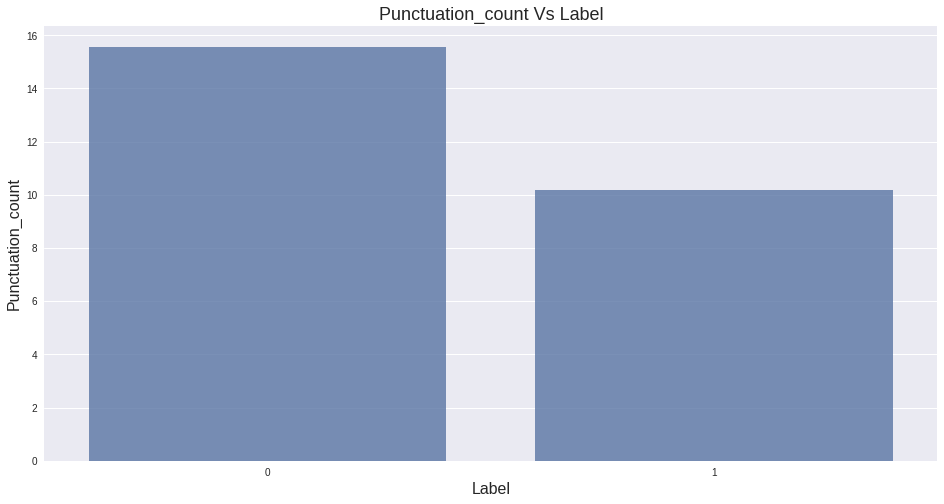

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Punctuation_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        #removing punctuation
        word = "".join((char for char in word if char not in string.punctuation))
        #print(word)
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)
        

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [40]:
cnt_srs = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    10.570667
1    13.823143
Name: matchesDf, dtype: float64

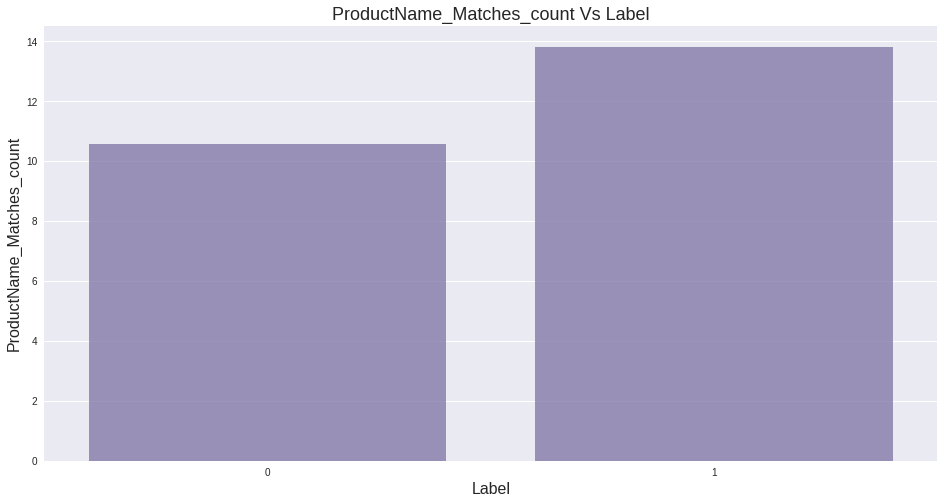

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('ProductName_Matches_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('ProductName_Matches_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [68]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [69]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

LABEL
0    107
1     85
Name: emojis, dtype: int64

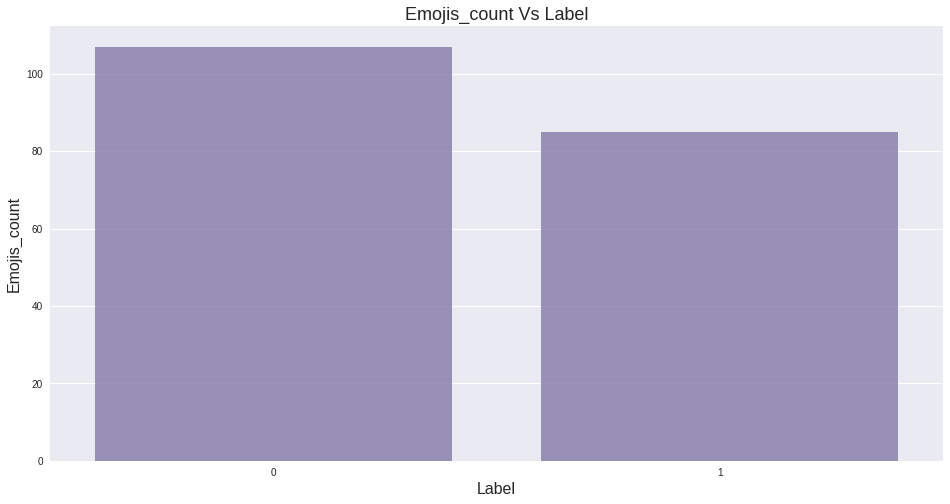

In [70]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

====== SENTIMENT CLASSIFIER ======

In [45]:
#SENTIMENT CLASSIFIER
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1


In [46]:
data.RATING.value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [47]:
data1 = data.loc[data['RATING'] == 1]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 0]

16183
3237


In [48]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,char_count,FKscore,stop_count,caps_count,punct_count,matchesDf,emojis
0,17838,0,1,Y,Home Improvement,B00004W3ZQ,Legrand C210 Wiremold Cord Mate II Kit,Wonderful product for running cables without d...,"Works great! I easy to install, just plan ahe...",156,2,123,24.133846,9,3,4,7,0
1,20521,0,1,Y,Video Games,B0052J8GF0,Zumba Fitness 2 - Nintendo Wii,Quite a Workout,I bought this as a way to get myself to exerc...,678,10,524,19.971764,66,29,13,6,0
2,667,1,1,N,PC,B003QH2MY6,Kinobo Wireless Slimline USB Mouse For Laptops...,Not bad,"Decent, have had pretty good tracking with thi...",117,3,92,8.898632,8,2,5,12,0
3,11333,0,1,N,Sports,B008EQ1LMS,Elixir Golf Sun Protection Arm Cooling Sleeve-...,Low cost. Works fairly well.,Low cost. Very stretchy. They block sun well...,1155,20,830,15.412154,88,21,74,9,0
4,8056,1,1,N,Luggage,B009I3OV8C,"Samsonite Luggage NYC Cityscapes Spinner 28, B...",complete & Strong & Trust-worthy & Fashionable,"Complete: unlike other luggage bags, this lugg...",471,6,363,24.119268,36,8,31,10,0
5,6246,1,1,Y,Home,B0020PECKM,UnCommon Artistry® Rubber Petal Style Earring ...,Five stars,"The earrings security support is transparent ,...",167,1,129,58.654970,11,1,6,7,0
6,1302,1,1,N,Electronics,B005B51KMQ,Sudebake SB6051 Woode Tuabe wih AM/FM Radio,satisfied,"It functions well, but is what it is; an inexp...",224,4,179,15.679464,15,4,8,7,0
7,10206,1,1,N,Luggage,B000VEKR4Y,"Samsonite 5 Piece Nested Luggage Set, Black",Great value for the money,"For a 110 bucks really cant go wrong, great qu...",271,2,206,46.224742,21,3,7,7,0
8,1656,1,1,N,Grocery,B000GCE2P6,"Johnson's Baby Powder, 1.5 oz",Product works well,"The powder is perfect, my only disappointment ...",112,2,89,15.626786,13,2,2,5,0
9,7027,1,1,N,Home Improvement,B0018P1RTE,Hardware House 543769 Berkshire 14-1/2-Inch by...,enough,It is simple and gives light. the design is go...,197,6,152,6.319569,13,4,8,12,0


In [50]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [51]:
rawData

[('Works great!  I easy to install, just plan ahead how you want to run minimize cosmetics.  The adhesive stays once touches dry wall, will not come off easily',
  1),
 ('I bought this  as a way to get myself to exercise. I am thin and healthy but I HATE working out. This turned out to be much more difficult than I expected. I had hoped that there would be several components that would be easy for anyone and that I could work my way up to the more challenging parts. Well even the so-called warm up just about killed me. I fell like I am too old (61) for this and will never be able to keep up with the intense pace of Zumba. I guess I should have bought a Richard Simmons Sweatin to the Oldies DVD instead. LOL Buy this if you are already pretty fit to add to your arsenal of workouts. If you are old and out of shape, this is too hard for you.',
  1),
 ("Decent, have had pretty good tracking with this.  Wouldn't say it's anything fancy but working is good for the price.",
  1),
 ("Low cost. 